In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = './food_test_c101_n1000_r128x128x3.h5'

with h5py.File(file_path, 'r') as f:
    print("Keys in file:")
    for key in f.keys():
        print(key)
        
    def explore(name, obj):
        print(name, ":", type(obj))
    f.visititems(explore)
    
    dataset_name = list(f.keys())[0]
    data = f[dataset_name][:]
    print("Shape of dataset:", data.shape)
    print("Data type:", data.dtype)

Keys in file:
category
category_names
images
category : <class 'h5py._hl.dataset.Dataset'>
category_names : <class 'h5py._hl.dataset.Dataset'>
images : <class 'h5py._hl.dataset.Dataset'>
Shape of dataset: (1000, 101)
Data type: bool


TypeError: Invalid shape (101,) for image data

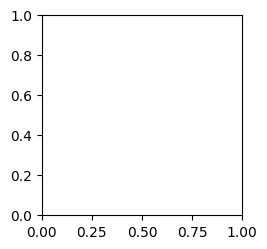

In [2]:
num_images = 5

plt.figure(figsize=(15, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    img = data[i]
    # Remove channel axis if grayscale
    if img.ndim == 3 and img.shape[-1] == 1:
        img = img.squeeze(-1)
    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis('off')
plt.show()

Image 0 shape: (101,)


ValueError: cannot reshape array of size 101 into shape (10,10)

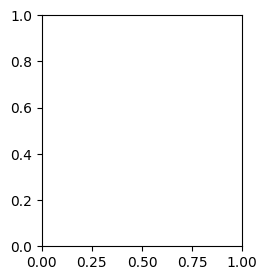

In [3]:
num_images = 5

plt.figure(figsize=(15, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    img = data[i]
    print(f"Image {i} shape: {img.shape}")
    # Check if it’s 1D
    if img.ndim == 1:
        # Try reshaping if you know the intended image shape, e.g., (10, 10) for 100, (10, 10, 1), etc.
        # Example:
        img_size = int(np.sqrt(img.shape[0]))  # assume square image
        img = img.reshape((img_size, img_size))
    elif img.ndim == 3 and img.shape[-1] == 1:
        img = img.squeeze(-1)  # remove single channel

    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis('off')
plt.show()